In [ ]:
from imutils.contours import sort_contours
import numpy as np
import imutils
import cv2
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loaded_model = pickle.load(open('Pickle_Model.pkl', 'rb'))
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/saved_model/my_model')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ankk.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)

In [ ]:
edged = cv2.Canny(dst, 30, 150)
cnts,h = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = sort_contours(cnts, method="left-to-right")[0]


In [ ]:
chars = []

In [ ]:
for c in cnts:

    (x, y, w, h) = cv2.boundingRect(c)


    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):

        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 150, 255,
            cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
        
        

        if tW > tH:
            thresh = imutils.resize(thresh, width=28)
        else:
            thresh = imutils.resize(thresh, height=28)
           
        (tH, tW) = thresh.shape
        dX = int(max(0, 28 - tW) / 2.0)
        dY = int(max(0, 28 - tH) / 2.0)

        padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
            left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
            value=(0, 0, 0))
        padded = cv2.resize(padded, (28, 28))


        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)

        chars.append((padded, (x, y, w, h)))

In [ ]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
preds = new_model.predict(chars)
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

[INFO] A - 99.99%


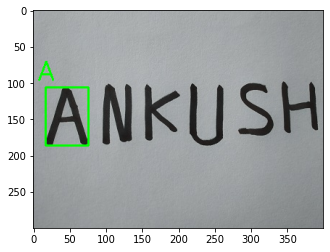

[INFO] N - 100.00%


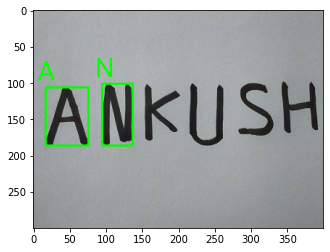

[INFO] K - 100.00%


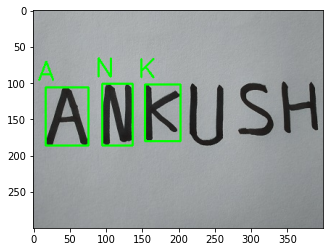

[INFO] U - 99.96%


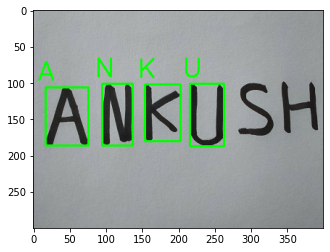

[INFO] S - 99.96%


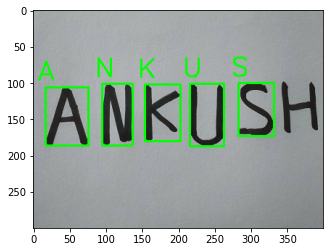

[INFO] H - 100.00%


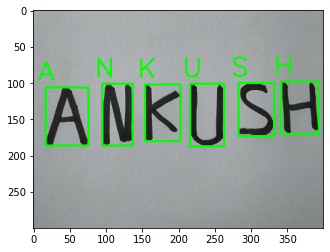

In [ ]:
from matplotlib import pyplot as plt
lst=list()
word=""
for (pred, (x, y, w, h)) in zip(preds, boxes):

    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]

    print("[INFO] {} - {:.2f}%".format(label, prob * 100))
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    word+=label
    
    cv2.putText(image, label, (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
    
    
    plt.imshow(image)
    plt.show()
    # cv2.imshow("Image", image)
    # cv2.waitKey(0)

In [ ]:
print(word)

ANKUSH
